In [23]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.59)


In [24]:
!pip install -U "scikit-learn==0.23.1"

Requirement already up-to-date: scikit-learn==0.23.1 in /usr/local/lib/python3.7/dist-packages (0.23.1)


In [25]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os.path
from os import path

In [26]:
ticker_list=['BRK-B','BRK-A','MSFT','AAPL','FB','JPM']
today = date.today()
l = len(ticker_list)
df_dict = {} # creating a dictionay for the data
files=[]
sector=[]
for i in range(0,l):
  sector = yf.Ticker(ticker_list[i]).info['sector']
  if path.exists('./'+sector) == False:
    os.mkdir('./'+sector)
  else:
    print("folder already exist");
# we are getting the data with a start and end and adding the extra column for the percentage change
def getData(ticker):
  print(ticker)
  data = pdr.get_data_yahoo(ticker, start="2020-01-01", end=today).reset_index()
  data['Symbol'] = ticker 
  data['percentage Change'] = data['Adj Close'].pct_change().dropna()
  
  df_dict[ticker] = data # storing the data frames in the dictionary
  dataname= ticker+'_'+str(today)
  files.append(dataname)
  SaveData(data, dataname,yf.Ticker(ticker).info['sector'])


# we are having the data based on the sector of the company
def SaveData(df, filename,sector):
  if (sector == 'Financial Services'):
    df.to_csv('./Financial Services/'+filename+'.csv')
  elif (sector == 'Technology'):
    df.to_csv('./Technology/'+filename+'.csv')
  elif (sector == 'Communication Services'):
     df.to_csv('./Communication Services/'+filename+'.csv')
  else:
    print("sector is not being considered");

for ticker in ticker_list:
  getData(ticker)

folder already exist
folder already exist
folder already exist
folder already exist
folder already exist
folder already exist
BRK-B
[*********************100%***********************]  1 of 1 completed
BRK-A
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
JPM
[*********************100%***********************]  1 of 1 completed


In [27]:
df_corr = {}
for ticker in ticker_list:
  df_corr[ticker] = df_dict[ticker][['Date','percentage Change', 'Symbol']]
  



In [28]:
df_corr['MSFT'].head()

,Date,percentage Change,Symbol
0,2020-01-02,NaN,MSFT
1,2020-01-03,-0.012452,MSFT
2,2020-01-06,0.002585,MSFT
3,2020-01-07,-0.009118,MSFT
4,2020-01-08,0.015928,MSFT


In [29]:

result = pd.concat([df_corr['BRK-A'],df_corr['BRK-B'],df_corr['MSFT'], df_corr['AAPL'],df_corr['JPM'],df_corr['FB']], axis=0)




In [30]:
df_pivot = result.pivot('Date','Symbol','percentage Change').reset_index()

df_pivot.head()

Symbol,Date,AAPL,BRK-A,BRK-B,FB,JPM,MSFT
0,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,-0.009722,-0.009075,-0.009676,-0.005291,-0.013197,-0.012452
2,2020-01-06,0.007968,0.003111,0.003581,0.018834,-0.000795,0.002585
3,2020-01-07,-0.004703,-0.003848,-0.004714,0.002164,-0.017001,-0.009118
4,2020-01-08,0.016086,0.000847,0.000310,0.010138,0.007801,0.015928


In [31]:
#finding the correlation between various companies
corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)

Symbol,AAPL,BRK-A,BRK-B,FB,JPM,MSFT
Symbol,,,,,,
AAPL,1.000000,0.563244,0.597759,0.745970,0.477045,0.824575
BRK-A,0.563244,1.000000,0.971807,0.483254,0.815763,0.603636
BRK-B,0.597759,0.971807,1.000000,0.511507,0.849181,0.649812
FB,0.745970,0.483254,0.511507,1.000000,0.415842,0.735233
JPM,0.477045,0.815763,0.849181,0.415842,1.000000,0.533530
MSFT,0.824575,0.603636,0.649812,0.735233,0.533530,1.000000


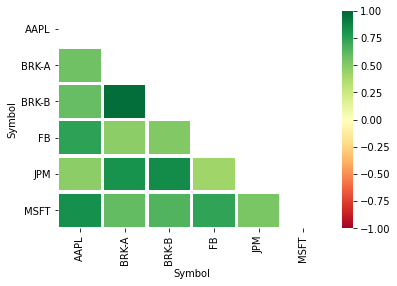

In [32]:
# generating the lower triangle correlation to see the correlation
mask = np.zeros_like(corr_df) # generate an array of zeros same as corr_df

mask[np.triu_indices_from(mask)] = True # mask upper triangle
sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

lagged cosscorrelation

In [33]:
# crosscorr is used to find the correlation of companies with a lag of lag days 
def crosscorr(companyx, companyy, lag=0):
    """
    lag is the no of days it is lagged
    """
    return companyx.corr(companyy.shift(lag))

calculating the correlation between two different companies

In [34]:
 #finding the correlation between two companies
 companyx='BRK-A'
 companyy ='BRK-B'
 xcrosscorr_days = [crosscorr(df_dict[ companyx]['percentage Change'], df_dict[ companyy]['percentage Change'], lag=i) for i in range(0,100)]

In [35]:
max_value = max( xcrosscorr_days)
print("The highest corelation on between ",yf.Ticker( companyx).info['longName'] ,"and", yf.Ticker( companyy).info['longName'],"is",max_value)

The highest corelation on between  Berkshire Hathaway Inc. and Berkshire Hathaway Inc. is 0.9718066547973372


In [36]:
 max_index =  xcrosscorr_days.index(max_value)
print("The highest corelation lag days between ",yf.Ticker( companyx).info['longName'] ,"and", yf.Ticker( companyy).info['longName'],"is",max_index)

The highest corelation lag days between  Berkshire Hathaway Inc. and Berkshire Hathaway Inc. is 0


stock_price_from_correlation, actual stock price


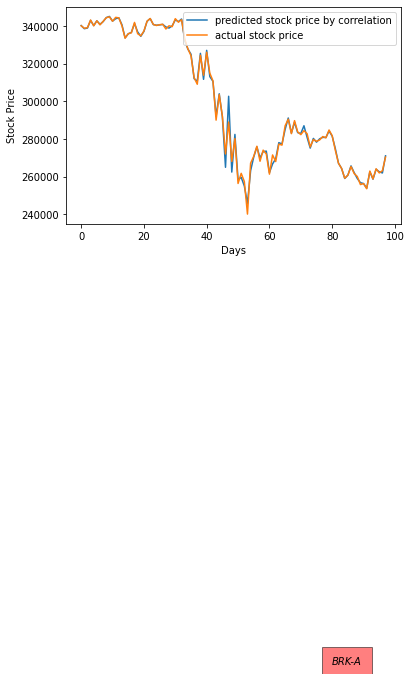

In [37]:
print("stock_price_from_correlation, actual stock price")

x = []
y = []
for i in range(2,100):
  percentage_change = df_corr[ companyy]['percentage Change'][i]
  stock_price_previous_day = df_dict[ companyx]['Close'][i-1]
  stock_price_previous_day = stock_price_previous_day + stock_price_previous_day*max_value* percentage_change 
  x.append(stock_price_previous_day)
  y.append(df_dict[ companyx]['Close'][i])
  
 
plt.plot(x, label = "predicted stock price by correlation")
plt.plot(y, label = "actual stock price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.text(80, 160,  companyx , style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.legend()
plt.show()
